In [1]:
import pandas as pd
from pathlib import Path

In [2]:
import sys
print(sys.executable)

C:\Users\jenas\OneDrive\Desktop\House_prediction\.venv\Scripts\python.exe


In [3]:
DATA_DIR = Path(r"C:\Users\jenas\OneDrive\Desktop\House_prediction\data\raw")

train_df = pd.read_csv(DATA_DIR / r"train.csv")
test_df  = pd.read_csv(DATA_DIR / r"test.csv")

train_df.shape, test_df.shape

((1460, 81), (1459, 80))

# Problem Definition

- Task: Supervised Regression
- Target Variable: SalePrice
- Input: 80 features in X (after dropping target)
- Evaluation Metric: RMSE (later)

In [4]:
target = "SalePrice"
X = train_df.drop(columns=[target])
y = train_df[target]

X.shape, y.shape

((1460, 80), (1460,))

In [5]:
numerical_features = X.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X.select_dtypes(include=["object"]).columns

len(numerical_features), len(categorical_features)

(37, 43)

In [6]:
missing = (
    X.isnull().sum().sort_values(ascending=False)
)
missing[missing > 0]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageQual        81
GarageFinish      81
GarageCond        81
GarageYrBlt       81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtQual          37
BsmtCond          37
MasVnrArea         8
Electrical         1
dtype: int64

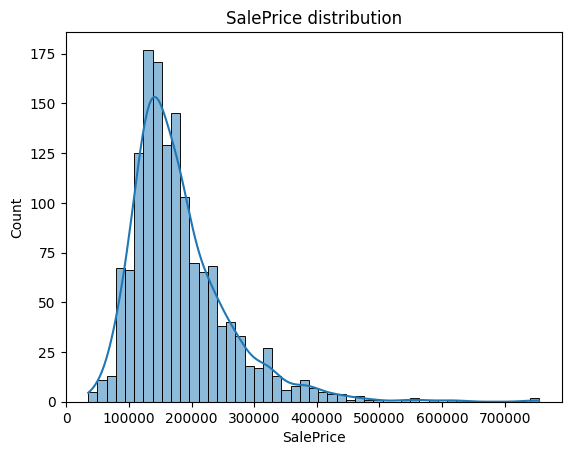

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
sns.histplot(y, kde=True)
plt.title("SalePrice distribution")
plt.show()

In [8]:
len(numerical_features), len(categorical_features)

(37, 43)

In [9]:
y.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [10]:
num_missing = X[numerical_features].isnull().sum()
num_missing[num_missing > 0].sort_values(ascending=False).head(10)

LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
dtype: int64

In [11]:
cat_missing = X[categorical_features].isnull().sum()
cat_missing[cat_missing > 0].sort_values(ascending=False).head(10)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
GarageFinish      81
GarageQual        81
GarageType        81
GarageCond        81
dtype: int64

# Missing Value Strategy (Draft)

- Numerical: median imputation
- Categorical: most frequent or “None”
- Columns with extreme missingness: review later